In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
import seaborn as sns
plt.style.use('ggplot')

In [73]:
df = pd.read_csv('train.csv')

In [74]:
df.isnull().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

In [75]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [76]:
df.Is_Response.unique()

array(['not happy', 'happy'], dtype=object)

In [77]:
df.drop(['Browser_Used','Device_Used','User_ID'],axis=1,inplace=True)

inplace=True: This parameter determines whether the operation should be performed in place or whether it should return a new DataFrame with the specifled columns removed. When inplace=True, the DataFrame is modified in place, meaning the changes are applied directly to the original DataFrame, and it returns None. If inplace=False or omitted (default), it returns a new DataFrame with the specifled columns removed without modifying the original DataFrame.

In [78]:
def change(message):
    if message == "not happy":
        return 0
    else:
        return 1

In [79]:
df['Is_Response'] = df[['Is_Response']].applymap(change)


In [80]:
df.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,0
1,I stayed at the Crown Plaza April -- - April -...,0
2,I booked this hotel through Hotwire at the low...,0
3,Stayed here with husband and sons on the way t...,1
4,My girlfriends and I stayed here to celebrate ...,0


In [81]:
features = df['Description']
targets = df['Is_Response']

In [82]:
x_train,x_test,y_train,y_test = train_test_split(features,targets,test_size=20,random_state=18)

In [83]:
def normalize(data):
    normalized = []
    for i in data:
        i = i.lower()
        #get rid of ris
        i = re.sub('https?://S+|www\.\S+', '', i)
        #get rid of non words and extra spaces
        i = re.sub('\\W' , ' ',i)
        i = re.sub('\n', '',i)
        i = re.sub(' +', '',i)
        i = re.sub('^', '',i)
        i = re.sub( '$', '',i)
        normalized.append(i)
    return normalized


In [84]:
x_train = normalize(x_train)
x_test = normalize(x_test)

l = i.lower(): This line converts the text to lowercase,which helps in standaridizing the text and reducing the vocabulary size

l = re.sub("https?://S+|www\S+',",l):This line removes URLs from the text by substituting them with an empty string

l= re.sub("\W','',l):This line removes non-word characters(characters other than letters,digits,or underscore)from 

the text by substituting them with a space.

l = re.sub("\n', ", l):

In [85]:
max_vocab = 10000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train)

max_vocab = 10000: This line sets the maximum vocabulary size to 10,000. When tokenizing text data, words that occur less frequently than this threshold will
be ignored or replaced with a special token. Setting a maximum vocabulary size helps control the size of the feature space and can prevent overfitting, especially in cases where the corpus contains a large number of unique words.
tokenizer = Tokenizer(num_words=max_vocab): This line initializes a tokenizer object with the specified maximum vocabulary size. The Tokenizer class is
typically provided by libraries such as Keras or TensorFlow and is used to convert text data into sequences of tokens (i.e., numerical representations). The num_words parameter specifies the maximum number of words to keep, based on word frequency.
tokenizer.fit_on_texts(X_train): This line fits the tokenizer on the training data X_ train


In [86]:
x_train

['iamaneventorganizerforanumberofprogramsassociatedwithharvardandtheassociatedteachinghospitalsbrighamandwomenschildrensetcandhavebeenworkingwiththebestwesterninnatlongwoodforyearsthegroupsalesstaffatthehotelhavebeennothingshortofhelpfulcourteousandamenableovertheyearsasihavecontactedthemwithaccommodationrequestsforguestlodgingforgroupsrangingfromjustafewroomstolargemultidayandweekroomblocksthehotelitselfislocatedinahighlyaccessibleareaofthecitywithproximitytoharvardmedicalschoolharvardschoolofpublichealththeharvardconferencecenterbrighamandwomenshospitalchildrenshospitalbostonbestisraeldeaconessmedicalcenterdanafarbercancerinstitutefenwayparkthemuseumoffineartsandmanyotherbostonlandmarksirecommendthehotelonaregularbasisforthesereasonsandthefactthatthepropertyiswellmaintainedhasmoderncleanroomsandisinasafehighlytraveledarea',
 'thelobbyandbararebeautifulpostfederalperiodworksofartthehotelisaquietsophisticatedrefugefromthenoiseofthecitygreatplacetomeetforabusinessmeetingoraquietdrinkiti

In [87]:
#tokenize the text into vectors
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

X_train = tokenizer.texts_to sequences(X train): This line converts the text data in the training set X train into sequences of integers. Each word in the text is
replaced by its corresponding integer index in the tokenizer's vocabulary. The resulting X_train will be a list of sequences, where each sequence represents a sentence in the original text but in integer-encoded form.


In [88]:
x_train

[[2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48],
 [49],
 [50],
 [51],
 [52],
 [53],
 [54],
 [55],
 [56],
 [57],
 [58],
 [59],
 [60],
 [61],
 [62],
 [63],
 [64],
 [65],
 [66],
 [67],
 [68],
 [69],
 [70],
 [71],
 [72],
 [73],
 [74],
 [75],
 [76],
 [77],
 [78],
 [79],
 [80],
 [81],
 [82],
 [83],
 [84],
 [85],
 [86],
 [87],
 [88],
 [89],
 [90],
 [91],
 [92],
 [93],
 [94],
 [95],
 [96],
 [97],
 [98],
 [99],
 [100],
 [101],
 [102],
 [103],
 [104],
 [105],
 [106],
 [107],
 [108],
 [109],
 [110],
 [111],
 [112],
 [113],
 [114],
 [115],
 [116],
 [117],
 [118],
 [119],
 [120],
 [121],
 [122],
 [123],
 [124],
 [125],
 [126],
 [127],
 [128],
 [129],
 [130],
 [131],
 [132],
 [133],
 [134],
 [135],
 [136],
 [137],
 [138],
 [139],
 [

In [89]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,padding='post',maxlen=256)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,padding='post',maxlen=256)

tf.keras.Sequential this initializes a sequential model, which is a linear stack of layers.Each layer in the model passes its output to the next layer in the sequence.

In [90]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, 128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         1280000   
                                                                 
 bidirectional_2 (Bidirecti  (None, None, 128)         98816     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 32)                18560     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

Embedding Layer. This layer takes Integer-encoded vocabulary as input and embeds it into a dense vector space of specified dimensionally (128 in this case).
The max _vocab varlable should be replaced with the maximum size of your vocabulary.
Bidirectional LSTM Layer (64 units): This layer consists of a bidirectional LSTM (Long Short-Term Memory) with 64 units, which means here are 64 LSTM cells in each direction (forward and backward). retum_ sequences=True means il returns the full sequence output.
A Bidirectional LSTM layer is a type of recurrent neural network (RNN) layer that processes the input sequence in both forward and backward directions
Standard LSTM:
In a standard LSTM layer, the input sequence is processed only in one direction, typically from the beginning to the end.
Bidirectional LSTM:
A Bidirectional LSTM processes the input sequence in both directions: forward (rom the beginning to the end) and backward (from the end to the beginning).
By processing the sequence in both directions, a Bidirectional LSTM has access to information from both the past and the future at each time step.
When retum_ sequences = True: you got placed uday
The LSTM layer will output a sequence of hidden states, with one hidden state vector for each timestep in the input sequence.


In [93]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(1e-4),metrics=["accuracy"])
history = model.fit(x_train,y_train,epochs=10,validation_split=0.1,batch_size=30,shuffle=True)


Epoch 1/10
1168/1168 [==============================] - 357s 298ms/step - loss: 0.8417 - accuracy: 0.5003 - val_loss: 0.6430 - val_accuracy: 0.6822
Epoch 2/10
1168/1168 [==============================] - 325s 278ms/step - loss: 0.7060 - accuracy: 0.5675 - val_loss: 0.6437 - val_accuracy: 0.6822
Epoch 3/10
1168/1168 [==============================] - 349s 299ms/step - loss: 0.6847 - accuracy: 0.6008 - val_loss: 0.6280 - val_accuracy: 0.6822
Epoch 4/10
1168/1168 [==============================] - 317s 272ms/step - loss: 0.6850 - accuracy: 0.5921 - val_loss: 0.6352 - val_accuracy: 0.6822
Epoch 5/10
1168/1168 [==============================] - 319s 273ms/step - loss: 0.6736 - accuracy: 0.6176 - val_loss: 0.6321 - val_accuracy: 0.6822
Epoch 6/10
1168/1168 [==============================] - 336s 288ms/step - loss: 0.6502 - accuracy: 0.6390 - val_loss: 0.6440 - val_accuracy: 0.6822
Epoch 7/10
1168/1168 [==============================] - 340s 291ms/step - loss: 0.5538 - accuracy: 0.7005 - val_

* validation_split=0.1 indicates that 10% of the training data will be used for validation
* batch_size = 30, sets the batch size to 30 meaning the model will update its weights after every batch of 30 samples
* shuffle=True shuffles the training data before each epoch


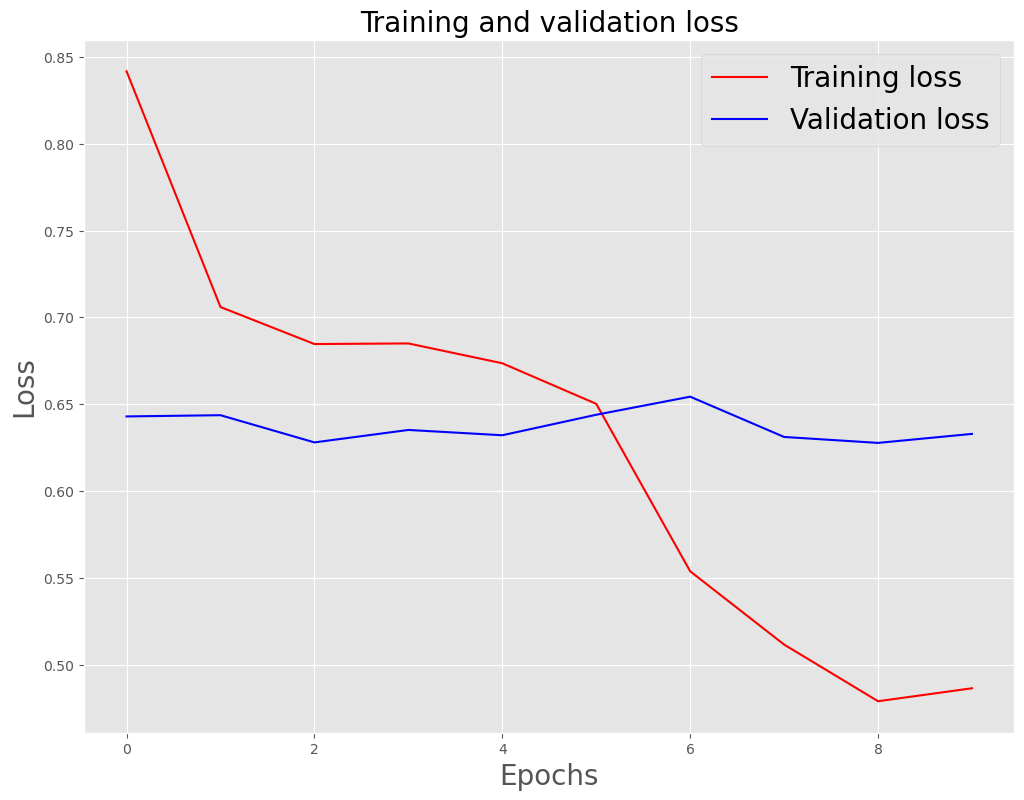

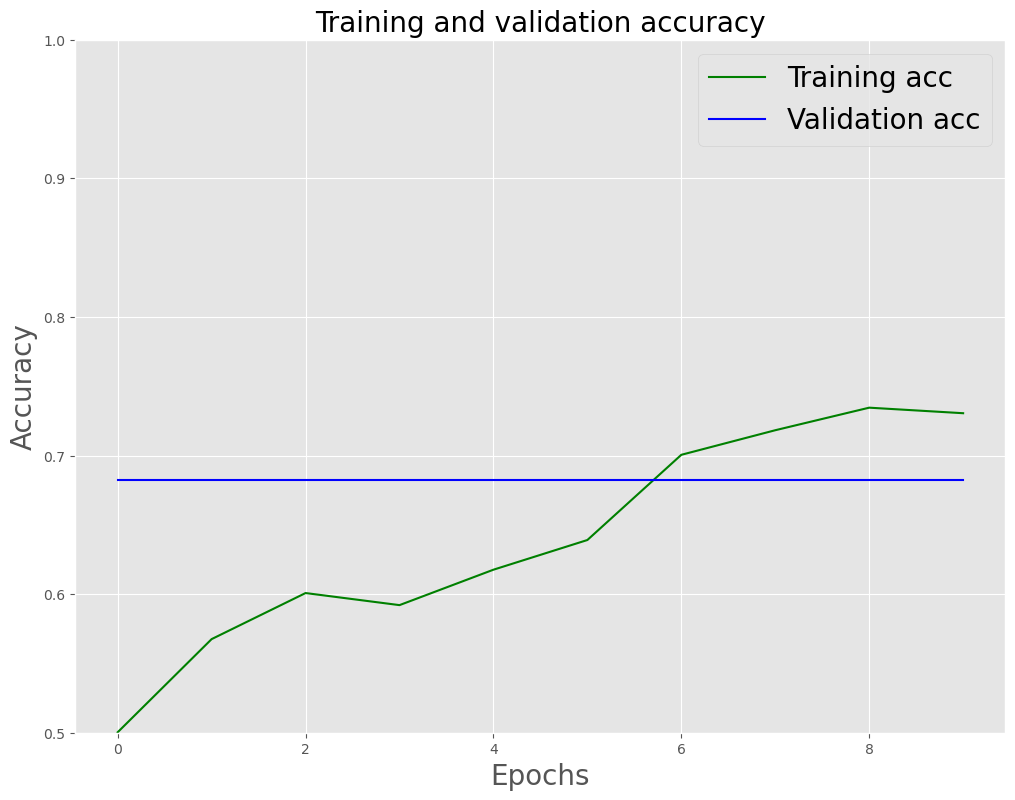

In [95]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss',size=20)
plt.xlabel('Epochs',size=20)
plt.ylabel('Loss',size=20)
plt.legend(prop={'size':20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs,acc,'g',label="Training acc")
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title("Training and validation accuracy",size=20)
plt.xlabel('Epochs',size=20)
plt.ylabel("Accuracy",size=20)
plt.legend(prop={'size':20})
plt.ylim((0.5,1))
plt.show()


In [96]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 86ms/step - loss: 0.7242 - accuracy: 0.5000


[0.7241896986961365, 0.5]

In [97]:
pred = model.predict(x_test)

binary_predictions=[]

for i in pred:
    if i>0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

1/1 [==============================] - 2s 2s/step


In [99]:
print("accuracy on testing set:",accuracy_score(binary_predictions,y_test))
print("Precision on testing set:",precision_score(binary_predictions,y_test))
print("Recall on testing set:",recall_score(binary_predictions,y_test))

accuracy on testing set: 0.5
Precision on testing set: 1.0
Recall on testing set: 0.5


In [100]:
predicts =['Steps off Times Square, nice rooms, stayed - nights, great for a short visit.']


In [101]:
predicts = normalize(predicts)
predicts = tokenizer.texts_to_sequences(predicts)
predicts = tf.keras.preprocessing.sequence.pad_sequences(predicts,padding='post',maxlen=256)
print(predicts)


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]]
